# **1. 결정 트리(Decision Tree)**
- 붓꽃 데이터를 활용할 예정입니다.

In [1]:
### 데이터 준비

# Import Libraries
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

## **1-1. 결정 트리 모델을 생성하고, 모델을 학습시켜 주세요.**
- 아래 코드의 빈칸을 채워주세요.

In [2]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier()

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

## **1-2. 결정 트리 모델의 시각화 결과를 보고 아래의 질문에 답해 주세요.**

In [3]:
### 결정 트리 시각화

from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity = True, filled = True)

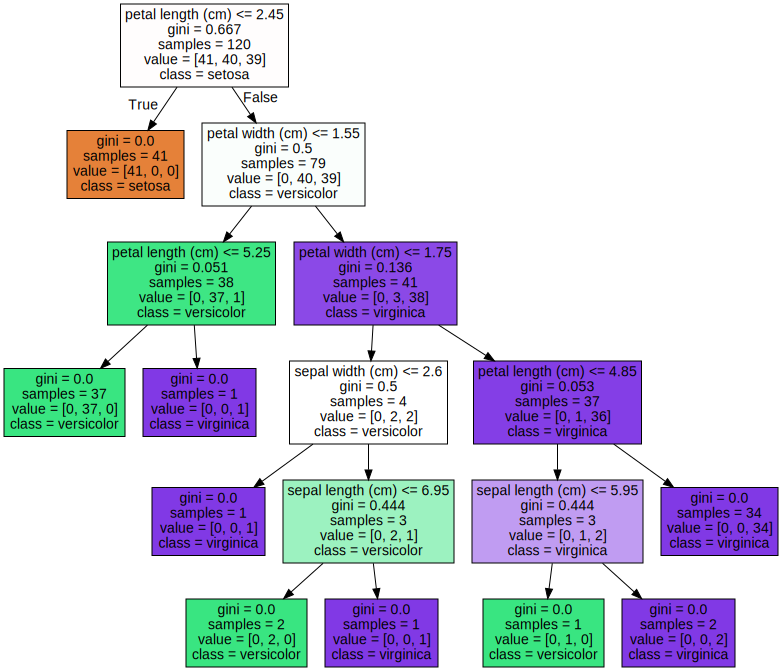

In [4]:
### 시각화 결과 확인

import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**📌 노드 내 지표 설명**
- petal length : 자식 노드를 만들기 위한 규칙 조건.
    - 이 조건이 없으면 리프 노드.
- gini : value=[  ]로 주어진 데이터 분포에서의 지니 계수.
- samples : 현 규칙에 해당하는 데이터 건수.
- value = [  ] : 클래스 값 기반의 데이터 건수.
    - 붓꽃 데이터 세트 클래스 값: 0, 1, 2
        - 0: Setosa 품종
        - 1: Versicolor 품종
        - 2: Virginia 품종
        - ex) Value = [41, 40, 39] : Setosa 41개, Versicolor 40개, Virginia 39개 의미.


### **문제**
- 시각화된 트리 내에서, 루트 노드 내 지표들이 의미하는 것을 각각 서술하세요.


### **답안**
**1-1) petal length(cm) <= 2.45**

: 자식노드를 만들기 위한 규칙 조건이다. petal length가 2.45cm가 넘는지 안 넘는지에 따라 분류한다. 이 조건이 없으면 리프 노드이다.

**1-2) gini = 0.667**

: 주어진 데이터 분포에서의 지니 계수이다. 

**1-3) samples = 120**

: 현 규칙에 해당하는 데이터 건수를 의미한다.

**1-4) value = [41, 40, 39]**

: 클래스 값 기반의 데이터 건수이다. 붓꽃 데이터 세트는 클래스 값으로 0,1,2를 가지고 있으며, 0:Setosa, 1:Versicolor, 2:Viginica 품종을 가리킨다. Value = [41,40, 39] 이므로 Setosa 41개, Vescioclor 40개, Virginica 39개로 데이터가 구성되어 있다는 의미이다.

**1-5) class = setosa**

: 하위 노드를 가질 경우에 Setosa의 개수가 제일 많다는 의미이다.

# **2. 결정 트리(2)**
- 3주차 브랜치에 있는 `banana_quality.csv` 를 다운받은 후 실습을 진행해 주세요.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## **2-1. `banana-quality.csv` 데이터를 불러와 banana에 저장해 주세요.**
- 파일 경로 설정 확인 해주세요.
- [구글 드라이브 마운트](https://velog.io/@kiache12/Colab%EC%97%90-%EA%B5%AC%EA%B8%80-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C-csv%ED%8C%8C%EC%9D%BC-%EB%A7%88%EC%9A%B4%ED%8A%B8%ED%95%98%EA%B8%B0)

In [ ]:
### 구글 Colab으로 과제를 수행하시는 분들만 실행해 주세요.

from google.colab import drive
drive.mount('/content/drive')

In [7]:
banana = pd.read_csv('./banana_quality.csv')

## **2-2. banana의 상위 5개 행을 확인해 봅시다.**

In [9]:
### 답안

banana.head()


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


## **2-3. 데이터 정보를 확인해 주세요.**

In [10]:
### 답안

banana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


## **2-4. feature(X)와 target(y)를 분리해 주세요.**
- 이때 target(y) 변수는 `Quality` 입니다.

In [12]:
### 답안

X = banana.drop(columns=['Quality'])
y = banana['Quality']


## **2-5. `train_test_split()`를 사용하여 훈련 세트와 테스트 세트로 나누어 주세요.**<br>
(random_state = 42, train: test = 8:2)

In [13]:
from sklearn.model_selection import train_test_split

### 답안

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **2-6. `DecisionTreeClassifier`를 사용해 훈련 데이터를 학습시킨 후, 테스트 데이터로 예측의 정확도를 구하세요.**
(DecisionTreeClassifer의 random_state = 42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### 답안

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=42)

# DecisionTreeClassifer 학습
dt_clf.fit(X_train, y_train)

# 예측
pred = dt_clf.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, pred)

print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.9387


## **2-7. GridSearchCV를 사용해 최적의 파라미터를 찾고, 예측을 수행하세요.**

**파라미터 조합**

```
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}
```

In [19]:
from sklearn.model_selection import GridSearchCV

### 답안

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]

}

# GridSearchCV 생성
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)

# GridSearchCV를 사용하여 모델 학습 및 최적의 파라미터 조합 찾기
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("최적의 파라미터:", grid_search.best_params_)

# 최적의 파라미터로 예측
y_pred_grid = grid_search.predict(X_test)

# 정확도 계산
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print("최적의 파라미터를 사용한 테스트 데이터 예측 정확도:", accuracy_grid)

최적의 파라미터: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
최적의 파라미터를 사용한 테스트 데이터 예측 정확도: 0.935625


## **2-8. 최고 평균 정확도 수치와 최적 하이퍼 파라미터를 출력하세요.**

**출력 형태**
```
GridSearchCV 최고 평균 정확도 수치 : ~<br>
GridSearchCV 최적 하이퍼 파라미터 :  {'criterion': ~, 'max_depth': ~, 'min_samples_split': ~}
```

In [20]:
### 답안

# 최고 평균 정확도 수치 출력
print("GridSearchCV 최고 평균 정확도 수치:", grid_search.best_score_)

# 최적 하이퍼 파라미터 출력
print("GridSearchCV 최적 하이퍼 파라미터:", grid_search.best_params_)

GridSearchCV 최고 평균 정확도 수치: 0.93671875
GridSearchCV 최적 하이퍼 파라미터: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


## **2-9. 최적화된 모델로 테스트 데이터 세트에 대해 예측을 수행해 주세요.**

In [21]:
### 답안

# 최적 모델로 예측
y_pred_best = grid_search.predict(X_test)

# 최적 모델 정확도 계산
accuracy_best = accuracy_score(y_test, y_pred_best)

print('결정 트리 예측 정확도 : ', accuracy)

결정 트리 예측 정확도 :  0.93875


## **2-10. 결정 트리에서 각 피처의 중요도를 확인해 주세요.**
- 중요도가 높은 순으로 **Top 5** 피처를 막대그래프로 표현해 주세요.

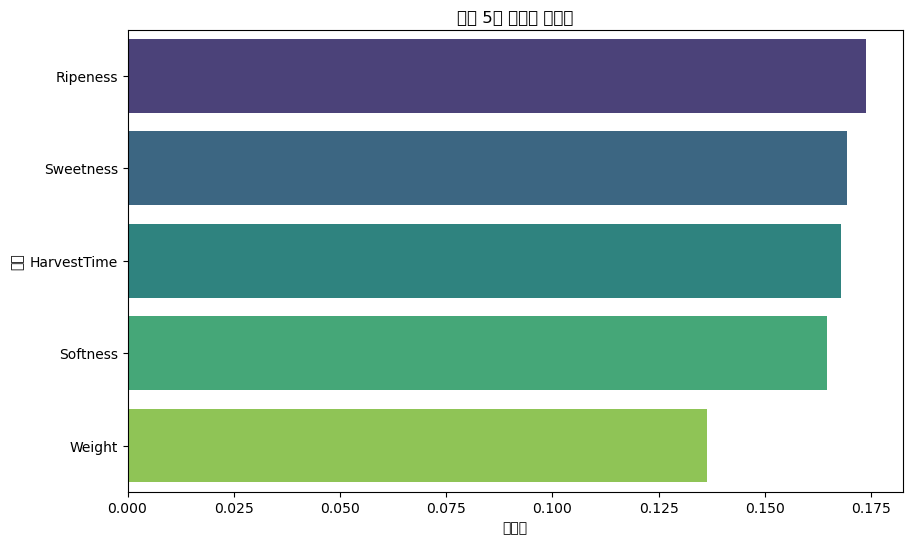

In [22]:
import seaborn as sns

### 답안

# 결정 트리에서 피처의 중요도 추출
feature_importances = grid_search.best_estimator_.feature_importances_

# 중요도가 높은 순으로 정렬하여 상위 5개 피처 선택
top_features_indices = feature_importances.argsort()[-5:][::-1]
top_features = X.columns[top_features_indices]
top_importances = feature_importances[top_features_indices]

# 중요도가 높은 순으로 상위 5개 피처를 막대그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, palette="viridis")
plt.xlabel('중요도')
plt.ylabel('피처')
plt.title('상위 5개 피처의 중요도')
plt.show()


# **3. 앙상블**

In [23]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## **3-1. wine 데이터셋을 `load_wine()` 함수를 사용해서 불러온 후, 훈련 세트와 테스트 세트로 나눠 주세요.**
- test_size=0.2, random_state=42

In [24]:
wine = load_wine()
X = wine.data
y = wine.target

## 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3-2. 로지스틱 회귀, KNN, 결정 트리를 개별 모델로 사용하여 개별 모델의 학습/예측/평가를 진행해 보세요.**
- 로지스틱 회귀: solver = "liblinear"
- KNN: n_neighbors = 16
- 결정 트리: random_state = 12

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
### 답안

lr_clf = LogisticRegression(solver="liblinear")
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)


knn_clf = KNeighborsClassifier(n_neighbors=16)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)


dt_clf = DecisionTreeClassifier(random_state=12)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)


print("로지스틱 회귀 정확도:", lr_accuracy)
print("KNN 정확도:", knn_accuracy)
print("결정 트리 정확도:", dt_accuracy)

로지스틱 회귀 정확도: 0.9722222222222222
KNN 정확도: 0.7222222222222222
결정 트리 정확도: 0.9444444444444444


## **3-3. 로지스틱 회귀와 결정 트리를 기반으로 하여 '하드 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해 보세요.**

In [27]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier 생성
vo_clf = VotingClassifier(estimators=[('lr', lr_clf), ('dt', dt_clf)], voting='hard')

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
vo_pred = vo_clf.predict(X_test)
vo_accuracy = accuracy_score(y_test, vo_pred)

# 평가 결과 출력
print("보팅 분류기 정확도:", vo_accuracy)


보팅 분류기 정확도: 0.9444444444444444


## **3-4. KNN과 결정트리를 기반으로 하여 '소프트 보팅' 방식으로 보팅 분류기를 생성한 후, 학습/예측/평가를 진행해보세요.**

In [29]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier 생성
vo_clf2 = VotingClassifier(estimators=[('knn', knn_clf), ('dt', dt_clf)], voting='soft')

# VotingClassifier 학습/예측/평가
vo_clf2.fit(X_train, y_train)
vo_pred2 = vo_clf2.predict(X_test)
vo_accuracy2 = accuracy_score(y_test, vo_pred2)


print("소프트 보팅 분류기 정확도:", vo_accuracy2)

소프트 보팅 분류기 정확도: 0.9444444444444444


# **4. 랜덤 포레스트**

- 예습 과제에서 사용되었던 `human_activity` 데이터를 다시 사용합니다.
  - 실습 전 디렉토리에 파일이 포함되어 있는지 확인해 주세요.
  - 데이터 파일 경로 확인 해주세요.
- 아래의 셀을 실행시킨 후에 실습을 진행해 주세요.

In [30]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

- 데이터 파일 경로 확인 해주세요.

In [31]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

    # 중복된 피처명을 수정한느 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩. 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

## **4-1. 위에서 정의한 `get_human_dataset()` 함수를 이용해 학습/테스트용 DataFrame 반환해 주세요.**
- 힌트) 파머완 p.205

In [32]:
X_train, X_test, y_train, y_test = get_human_dataset()

## **4-2. 랜덤 포레스트 모델을 학습시키고,테스트 세트로 예측 성능을 평가해 주세요.**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [35]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("랜덤 포레스트 예측 정확도:", accuracy_rf)

랜덤 포레스트 예측 정확도: 0.9317950458092976


## **4-3. GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터를 튜닝 해 봅시다.**
- 아래의 코드를 완성해주세요.
- **조건**: n_estimators = 100

In [44]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',  grid_cv.best_params_ )
print('최고 예측 정확도: {0:.4f}',  grid_cv.best_params_)

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: {0:.4f} {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


## **4-4. 위에서 구한 최적 파라미터로 `RandomForestClassifier`를 다시 학습시킨 뒤에 예측 정확도를 구해보세요.**
- 빈칸을 채워주세요.

In [45]:
rf_clf_best = RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=100, random_state=0, n_jobs=-1)
rf_clf_best.fit(X_train, y_train)
pred = rf_clf_best.predict(X_test)
print('예측 정확도: {0:.4f}'. format(accuracy_score(y_test, pred)))

예측 정확도: 0.9196


# **5. OOB 평가**

- 다음 코드를 완성해 주세요.  
(핸즈온 머신러닝 7.2.2 참고)

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True )

# **6. SVM**
(핸즈온 머신러닝 5.1장, 5.2장)

- 아래의 셀을 실행시킨 후에 실습을 진행해 주세요.

In [3]:
# 파이썬
import sys
assert sys.version_info >= (3, 7)

# 사이킷런
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# 기본 글꼴
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 이미지 저장
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

## **6-1. polynomial_svm_clf 코드를 완성해 보세요.**
- 빈칸을 채워주세요.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X, y = make_moons(n_samples=100, noise=0.15)

## polynomial_svm_clf 코드를 완성해 보세요.
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler",  StandardScaler() ),
    ("svm_clf", SVC(kernel="linear", C=10) )
     ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=10, kernel='linear'))])

**아래의 코드를 실행해서 그래프를 출력해 보세요.**

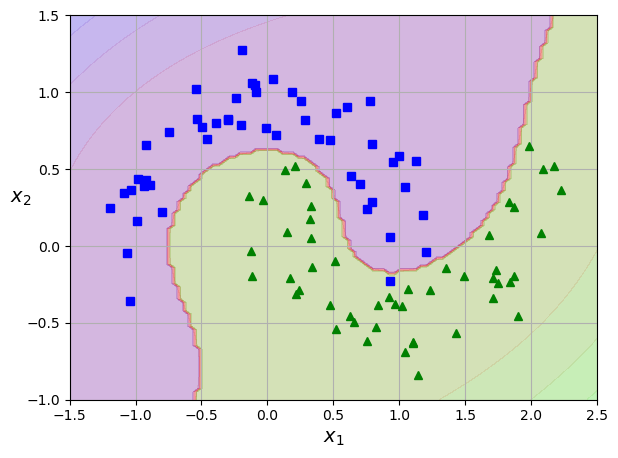

In [7]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## **6-2. 다음은 가우시안 RBF를 사용한 유사도 특성을 나타내는 그래프입니다.**

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [9]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

### **문제**
- 아래의 종 모양 그래프를 좁아지게 만들려면 코드의 어떤 부분을 바꿔야 할까요?
- 아래의 셀을 복사하여 새로운 셀을 만들고 코드를 !한줄만! 수정하여 실행해 보세요.  
(숫자 값은 임의로 설정하시면 됩니다.)

In [16]:
gamma = 5

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

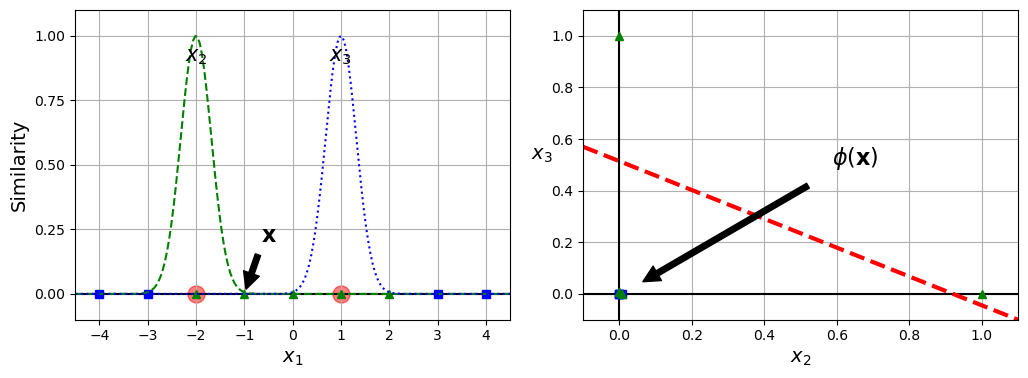

In [17]:
### 시각화

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("$x_1$")
plt.ylabel("Similarity")
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$  ", rotation=0)
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16,
)
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()